In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy as np
from scipy.spatial import distance
import math
import statistics

In [542]:
#filter specific file names

# Setup variables
dataset_number = 5

final_csv_path = Path('./RZ Cep/All_RZ_Cep/Light Curve CSVs/')
current_filter = 'Luminance'

if dataset_number == 1:
    luminance = 'star_Light_Luminance_5_secs_001_reduced_matched.csv'
    read_path = Path(f'./RZ Cep/All_RZ_Cep/2022_12_07/RZ_Cep/CSVs/Matched Stars/{current_filter}')
    final_csv_name = '2022_12_07_normalised_curve_1.csv'
    write_path = Path(f'./RZ Cep/All_RZ_Cep/2022_12_07/RZ_Cep/CSVs/Normalised')
    
    file_list = [f for f in os.listdir(read_path)if f.endswith('_photometery.csv') and f != ref_csv_name]
elif dataset_number == 2:
    luminance = 'star_Light_Luminance_10_secs_001_reduced_matched.csv'
    read_path = Path(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/CSVs/Matched Stars/{current_filter}')
    final_csv_name = '2023_01_23_normalised_curve_1.csv'
    write_path = Path(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/CSVs/Normalised')
    
    file_list = [f for f in os.listdir(read_path)if f.endswith('.csv') and f != ref_csv_name]
elif dataset_number == 3:
    luminance = 'RZ_Cep_Light_Luminance_10_secs_001_reduced_matched.csv'
    read_path = Path(f'./RZ Cep/All_RZ_Cep/2023_02_23/RZ_Cep/CSVs/Matched Stars/{current_filter}')
    final_csv_name = '2023_02_23_normalised_curve_1.csv'
    write_path = Path(f'./RZ Cep/All_RZ_Cep/2023_02_23/RZ_Cep/CSVs/Normalised')
    
    file_list = [f for f in os.listdir(read_path)if f.endswith('.csv') and f != ref_csv_name]
elif dataset_number == 4:
    luminance = 'Light_Luminance_3.500_secs_001_reduced_matched.csv'
    read_path = Path(f'./RZ Cep/All_RZ_Cep/2023_11_10/RZ_Cep/CSVs/Matched Stars/{current_filter}')
    final_csv_name = '2023_11_10_normalised_curve_1.csv'
    write_path = Path(f'./RZ Cep/All_RZ_Cep/2023_11_10/RZ_Cep/CSVs/Normalised')
    
    file_list = [f for f in os.listdir(read_path)if f.endswith('.csv') and f != ref_csv_name]
elif dataset_number == 5:
    read_path = Path(f'./RZ Cep/2023_1_23/Photometry Practise Z/Z_aligned_coords_transformed_night4/')
    final_csv_name = '2023_11_10_normalised_curve_1.csv'
    file_list = [f for f in os.listdir(read_path)if f.endswith('_edit.csv') and f != ref_csv_name]

#set current filter
ref_csv_name = luminance

#read_path = Path(f'./RZ Cep/2023_1_23/Photometry Practise Z/Z_aligned_coords_transformed_night4/')
#file_list = [f for f in os.listdir(read_path)if f.endswith('.csv') and f != ref_csv_name]

In [543]:
#column names for reference dataframe
mag_name = 'instrumental_mag'
mag_error_name = 'mag_error'
corr_mag_name = 'corrected_mag'
corr_mag_x_name = 'corrected_mag_x'
date_time_name = 'date_time'
exp_time_name = 'exp_time'
star_id_name = 'star_id'
x_pos_name = 'x_center'
y_pos_name = 'y_center'

In [544]:
reference_image = pd.read_csv(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/CSVs/Matched Stars/Luminance/star_Light_Luminance_10_secs_001_reduced_matched.csv')
reference_image.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [545]:
def find_position_estimates(dataframe):
    pos_est = {}
    all_past_positions = {}

    for idx, row in dataframe.iterrows():
        star_name = row[star_id_name]
        if star_name not in all_past_positions:
            all_past_positions[star_name] = [[row[x_pos_name], row[y_pos_name]]]
        else:
            all_past_positions[star_name].append([row[x_pos_name], row[y_pos_name]])

    for key, array in all_past_positions.items():
        pos_est[key] = np.mean(array, axis=0)

    #print(pos_est)
    return pos_est

pos_est_reference = find_position_estimates(reference_image)

In [546]:
def drop_duplicate_stars(dataframe, star_id_name, magnitude_name):
    return dataframe.sort_values(magnitude_name, ascending=True).drop_duplicates(subset=[star_id_name]).reset_index()

     
reference_image = drop_duplicate_stars(reference_image, star_id_name, corr_mag_name)
print(reference_image)
ref_stars = reference_image[star_id_name]

    index     x_center     y_center   annulus_bkg        counts  \
0       0  2371.940087  1757.232620  1.005194e+06  5.497275e+06   
1       2   290.805842  3145.616991  9.972489e+05  3.177346e+06   
2       1  3205.813255  1039.548902  9.887176e+05  2.681512e+06   
3       3  4065.001477  2852.176462  9.876802e+05  2.213906e+06   
4       4  2143.632606    34.747785  9.717323e+05  1.942378e+06   
5       8  1549.183181  2291.677309  9.869835e+05  1.869690e+06   
6      10  2171.615644  2684.893588  9.841531e+05  1.827776e+06   
7       9   263.058112  1543.658958  9.931842e+05  1.741324e+06   
8       6  3888.112165  2087.020853  9.709024e+05  1.709809e+06   
9       5  3053.174850    59.338928  1.003149e+06  1.708791e+06   
10      7   581.413314   128.109069  9.804224e+05  1.682938e+06   
11     11  1281.889301  1551.666540  9.801696e+05  1.629272e+06   
12     12  3358.746222  2845.711540  9.708009e+05  1.438290e+06   
13     17  1768.284794  2999.416703  9.713364e+05  1.342645e+0

In [547]:
#column names for current image

if dataset_number == 1: 
    mag_name = 'Source_Mag'
    mag_error_name = 'Source_Mag_Error'
    corr_mag_name = 'Corrected_Mag'
    corr_mag_x_name = 'corrected_mag'
    corr_mag_y_name = 'Corrected_Mag'
    date_time_name = 'Date Observation'
    exp_time_name = 'Exposure time /s '
    star_id_name = 'star_id'
    x_pos_name = 'xcenter'
    y_pos_name = 'ycenter'
elif dataset_number in (2, 3, 4):
    mag_name = 'instrumental_mag'
    mag_error_name = 'mag_error'
    corr_mag_name = 'corrected_mag'
    corr_mag_x_name = 'corrected_mag_x'
    corr_mag_y_name = 'corrected_mag_y'
    date_time_name = 'date_time'
    exp_time_name = 'exp_time'
    star_id_name = 'star_id'
    x_pos_name = 'x_center'
    y_pos_name = 'y_center'
elif dataset_number == 5:
    mag_name = 'instrumental_mag'
    mag_error_name = 'mag_error'
    corr_mag_name = 'corr_mag'
    corr_mag_x_name = 'corrected_mag'
    corr_mag_y_name = 'corr_mag'
    date_time_name = 'date_time'
    exp_time_name = 'exp_time'
    star_id_name = 'Main_ID'
    x_pos_name = 'x_center'
    y_pos_name = 'y_center'

In [548]:
'''
correction_array = []
date_time_array = []
corrected_mags = []
errors = []

for image in file_list:
    current_image = pd.read_csv(read_path / image)
    current_image.drop(columns=['Unnamed: 0'], inplace=True)
    
    current_pos_est = find_position_estimates(current_image)
    drop_duplicate_stars(current_image, current_pos_est)
        
    merged_image = pd.merge(left=reference_image, right=current_image, on='star_id', how='inner')
    merged_image.sort_values([corr_mag_x_name], inplace=True)
    
    merged_image['delta_mag'] = merged_image[corr_mag_x_name] - merged_image[corr_mag_y_name]
    merged_image = merged_image[merged_image.star_id!='V* RZ Cep']
    
    zp_correction = np.mean(merged_image['delta_mag'])
    zp_correction_err = np.std(merged_image['delta_mag']) / np.sqrt(float(len(merged_image['delta_mag'])))
    
    correction_array.append([zp_correction, zp_correction_err])
    
    current_image['normalised_mag'] = current_image[corr_mag_name] + zp_correction
    current_image['updated_mag_error'] = current_image[mag_error_name] + abs(zp_correction_err)
    
    RZ_Cep_mag = current_image.loc[current_image['star_id'] == 'V* RZ Cep'][corr_mag_name]
    error = abs(current_image.loc[current_image['star_id'] == 'V* RZ Cep'][mag_error_name])

    if len(RZ_Cep_mag) == 0:
        continue
    corrected_mags.append(float(RZ_Cep_mag + zp_correction))
    date_time_array.append(current_image[date_time_name][0])
    errors.append(float(error + zp_correction_err))
    nov_stars = current_image['star_id']
    
    file_name = image.replace('_matched.csv','_normalised.csv')
    #file_name = image.replace('_photometery.csv', '_normalised.csv')
    print(file_name)
    current_image.to_csv(write_path / file_name)

'''
pass

In [549]:
if dataset_number == 1:
    star_list = ['Gaia DR3 2212396207462733568', 'TYC 4273-900-1', 'GSH 109+06-32', 
                 '2MASS J22405245+6505370', 'LSPM J2241+6501']
elif dataset_number == 2:
    star_list = ['TYC 4273-659-1', 'TYC 4273-822-1', '2MASS J22365043+6456254', 
                 '2MASS J22405245+6505370', 'IRAS 22404+6450']
elif dataset_number == 3:
    star_list = ['TYC 4273-673-1', 'NVSS J224054+645420', 'GSH 109+06-32', 
                 'TYC 4273-876-1', 'LSPM J2241+6501']
elif dataset_number == 4:
    star_list = ['TYC 4273-1186-1', 'TYC 4273-293-1', 'TYC 4273-876-1', 
                 'TYC 4273-668-1', 'GSH 109+06-32']
elif dataset_number == 5:
    star_list = ['TYC 4273-435-1', 'TYC 4273-1186-1', 'TYC 4273-922-1', 
                 'TYC 4273-1038-1', 'TYC 4273-1351-1']

In [550]:
correction_array = []
date_time_array = []
corrected_mags = []
errors = []

stan_1 = []
stan_2 = []
stan_3 = []
stan_4 = []
stan_5 = []

counts_aperture = []
counts_annulus = []
sky_subtracted_counts = []
aperture_radius = []

for image in file_list:
    current_image = pd.read_csv(read_path / image)
    current_image.drop(columns=['Unnamed: 0'], inplace=True)
    #print(current_image)
    
    #current_pos_est = find_position_estimates(current_image)
    current_image = drop_duplicate_stars(current_image, star_id_name, corr_mag_name)
    #print(current_image[date_time_name])
    #print(current_image)

    if dataset_number in (1, 2, 3, 4):
        merged_image = pd.merge(left=reference_image, right=current_image, on='star_id', how='inner')
    elif dataset_number == 5:
        merged_image = pd.merge(left=reference_image, right=current_image, left_on='star_id', right_on='Main_ID', how='inner')
    
    merged_image.sort_values([corr_mag_x_name], inplace=True)
    merged_image['delta_mag'] = merged_image[corr_mag_x_name] - merged_image[corr_mag_y_name] 
    merged_image_new = merged_image[merged_image[star_id_name].isin(star_list)]

    #print(merged_image_new)
    zp_correction = np.mean(merged_image_new['delta_mag'])
    zp_correction_err = np.std(merged_image_new['delta_mag']) / np.sqrt(float(len(merged_image_new['delta_mag'])))
    
    correction_array.append([zp_correction, zp_correction_err])
    
    current_image['normalised_mag'] = current_image[corr_mag_name] + zp_correction
    current_image['updated_mag_error'] = current_image[mag_error_name] + abs(zp_correction_err)
    
    RZ_Cep_mag = current_image.loc[current_image[star_id_name] == 'V* RZ Cep']['normalised_mag']
    #print(RZ_Cep_mag)
    
    error = abs(current_image.loc[current_image[star_id_name] == 'V* RZ Cep'][mag_error_name])

    if len(RZ_Cep_mag) == 0:
        #print(current_image[date_time_name][0])
        continue

    corrected_mags.append(float(RZ_Cep_mag))

    date_time_array.append(current_image[date_time_name][0])
    errors.append(float(error + zp_correction_err))
    
    if dataset_number == 1:
        counts_aperture.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['Circ_sum_flux']))
        counts_annulus.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['Annu_sum_flux']))
        sky_subtracted_counts.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['Circ_sum_flux_minus_back']))
        aperture_radius.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['Apperature_radius_pixels'])) 
        
        file_name = image.replace('_photometery.csv', '_normalised.csv')
    elif dataset_number in (2, 3, 4):
        counts_aperture.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['counts']))
        counts_annulus.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['annulus_bkg']))
        sky_subtracted_counts.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['sky_corrected_counts']))
        aperture_radius.append(float(current_image.loc[current_image['star_id'] == 'V* RZ Cep']['FWHM']) * 3)
        
        file_name = image.replace('_matched.csv','_normalised.csv')
    elif dataset_number == 5:
        file_name = image.replace('_matched.csv_edit.csv', '_normalised.csv')
    
    print(file_name)
    #current_image.to_csv(write_path / file_name)

Light_Luminance_3.500_secs_002_reduced_stars_z_normalised.csv
Light_Luminance_3.500_secs_003_reduced_stars_z_normalised.csv
Light_Luminance_3.500_secs_004_reduced_stars_z_normalised.csv
Light_Luminance_3.500_secs_005_reduced_stars_z_normalised.csv
Light_Luminance_3.500_secs_006_reduced_stars_z_normalised.csv
Light_Luminance_3.500_secs_007_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_001_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_002_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_003_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_004_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_005_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_006_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_007_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_008_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_009_reduced_stars_z_normalised.csv
Light_Luminance_5_secs_010_reduced_stars_z_normalised.csv
star_Light_Luminance_3.500_secs_001_reduced_star

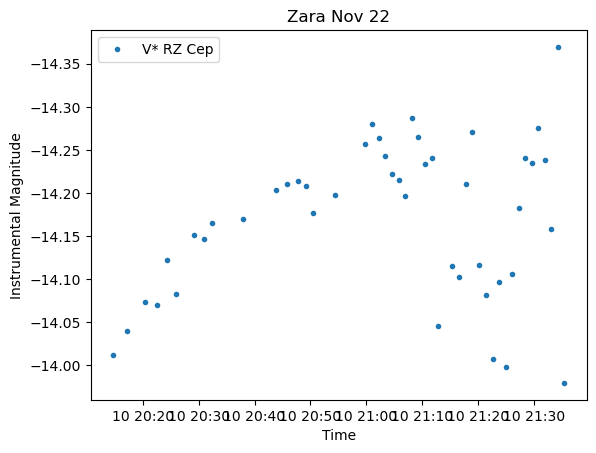

In [551]:
date_times = pd.to_datetime(date_time_array)

errors = np.asarray(errors)
#print(errors)
#err_stan = np.asarray(err_stan)
corrected_mags = np.asarray(corrected_mags)
#print(corrected_mags)
#corr_stan = np.asarray(corr_stan)

# stan_1 = np.asarray(stan_1)
# stan_2 = np.asarray(stan_2)
# stan_3 = np.asarray(stan_3)
# stan_4 = np.asarray(stan_4)
# stan_5 = np.asarray(stan_5)
# print(len(date_time_array))
# print(len(stan_1))
#plt.errorbar(date_times, corrected_mags, yerr=errors, marker='.', ls='None', label='V* RZ Cep')
plt.plot(date_times, corrected_mags, marker='.', ls='None', label='V* RZ Cep')
# plt.plot(date_times, stan_1, marker='.', ls='None', label='TYC 4273-435-1')
# plt.plot(date_times, stan_2, marker='.', ls='None', label='TYC 4273-1186-1')
# plt.plot(date_times, stan_3, marker='.', ls='None', label='TYC 4273-922-1')
# plt.plot(date_times, stan_4, marker='.', ls='None', label='TYC 4273-1038-1')
# plt.plot(date_times, stan_5, marker='.', ls='None', label='TYC 4273-1351-1')
plt.gca().invert_yaxis()
plt.legend()
if dataset_number == 1:
    plt.title('Dec 22')
elif dataset_number == 2:
    plt.title('Jan 23')
elif dataset_number == 3:
    plt.title('Feb 23')
elif dataset_number == 4:
    plt.title('Nov 23')
elif dataset_number == 5:
    plt.title('Zara Nov 22')
plt.xlabel('Time')
plt.ylabel('Instrumental Magnitude')
plt.show()

In [552]:
#use ap stats error or sqrt counts

df_curve = pd.DataFrame(data=(corrected_mags, errors, date_times, counts_aperture, counts_annulus, 
                              sky_subtracted_counts, aperture_radius))
df_curve = df_curve.T
df_curve.columns = ['corrected_magnitude', 'magnitude_error', 'date_time', 'ap_counts', 'an_counts',
                   'sky_sub', 'radius']
df_curve.to_csv(final_csv_path / final_csv_name)

# df_curve = pd.DataFrame(data=(corrected_mags, errors, date_times))
# df_curve = df_curve.T
# df_curve.columns = ['corrected_magnitude', 'magnitude_error', 'date_time']
# df_curve.to_csv(final_csv_path / final_csv_name)

# df_curve1 = pd.DataFrame(data=(corr_stan, err_stan, date_times))
# df_curve1 = df_curve1.T
# df_curve1.columns = ['corrected_magnitude', 'magnitude_error', 'date_time']
# df_curve1.to_csv(final_csv_path / 'stan_nov.csv')

In [53]:
#find stars common between all images
names1 = set(nov_stars).intersection(feb_stars)
names2 = set(jan_stars).intersection(dec_stars)
names = set(names1).intersection(names2)
names
zara_stars = ['TYC 4273-435-1', 'TYC 4273-1186-1', 'TYC 4273-922-1', 'TYC 4273-1038-1', 'TYC 4273-1351-1']

NameError: name 'nov_stars' is not defined

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
C:\Users\es2143\AppData\Local\Temp\ipykernel_21800\192203756.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('hsv')


42


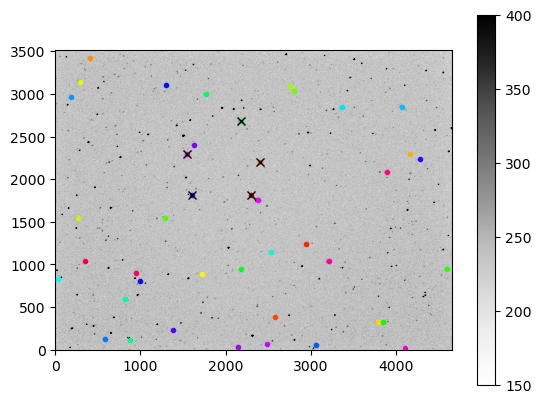

In [527]:
from astropy.nddata import CCDData
import matplotlib.cm

path_stars = Path(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/CSVs/Normalised')
file_list_2 = [f for f in os.listdir(path_stars)if f.endswith('.csv')]
lent = len(file_list_2) - 1
stars_nov = pd.read_csv(path_stars / file_list_2[0])

positions = []
names = []
for idx, row in stars_nov.iterrows():
    positions.append([float(row[x_pos_name]), float(row[y_pos_name])])
    names.append(str(row['star_id']))
    
ref_im = CCDData.read(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/Lights/Luminance Reduced/star_Light_Luminance_10_secs_001_reduced.fits')

cmap=plt.cm.get_cmap('hsv')
norm = plt.Normalize(0, len(names))
print(len(names))
for i in range(len(names)):
    plt.plot(positions[i][0], positions[i][1], marker='.', color=cmap(norm(i)), ls='None')
# , label=names[i]

plt.plot(positions[0][0], positions[0][1], marker='x', color='k', label=names[0])
plt.plot(positions[3][0], positions[3][1], marker='x', color='k', label=names[3])
plt.plot(positions[36][0], positions[36][1], marker='x', color='k', label=names[36])
plt.plot(positions[27][0], positions[27][1], marker='x', color='k', label=names[27])
plt.plot(positions[16][0], positions[16][1], marker='x', color='k', label=names[16])
plt.imshow(ref_im.data, cmap='Greys', vmin=150, vmax=400)
plt.gca().invert_yaxis()
plt.colorbar()
#plt.legend()
plt.show()


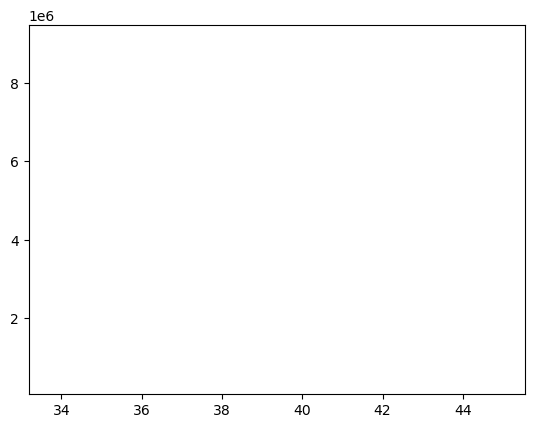

In [8]:
path_stars_2 = Path(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/CSVs/Normalised')
file_list_3 = [f for f in os.listdir(path_stars_2)if f.endswith('.csv')]

counts_aperture = []
counts_annulus = []
sky_subtracted_counts = []
aperture_radius = []

for i in range(len(file_list_3)):
    df = pd.read_csv(path_stars_2 / file_list_3[i])
    counts_aperture.append(float(df.loc[df['star_id'] == 'V* RZ Cep']['counts']))
    counts_annulus.append(float(df.loc[df['star_id'] == 'V* RZ Cep']['annulus_bkg']))
    sky_subtracted_counts.append(float(df.loc[df['star_id'] == 'V* RZ Cep']['sky_corrected_counts']))
    aperture_radius.append(float(df.loc[df['star_id'] == 'V* RZ Cep']['FWHM']) * 3)
    
plt.plot(aperture_radius, counts_aperture, ls='None', label='Counts in Aperture')
plt.plot(aperture_radius, counts_annulus, ls='None', label='Counts in Annulus')
plt.plot(aperture_radius, sky_subtracted_counts, ls='None', label='Annulus Corrected Aperture Counts')
plt.show()